In [28]:
from matplotlib import pyplot as mpl, cm
import numpy as np
from numpy import genfromtxt
import os
#os.chdir('/home/kenetc/Documents/FCEyN/1Redes Neuronales/clases/practicas/datos')
#os.chdir('/home/Documentos/redesn/Practicas')
os.getcwd()
raw_data = open('tp1_ej1_training.csv')
data = np.loadtxt(raw_data, delimiter=",")
#data = genfromtxt('tp1_ej1_training.csv',delimiter=",")

In [30]:
z1 = data[:,:1]
x1 = data[:,1:]
#normalizacion de los datos 
x = (x1-x1.mean(axis=0)) / x1.std(axis=0)
z2 = [] 
for i in z1 : 
    if (i==0):
        z2.append([-1])
    else: 
        z2.append([1])
z2 = np.array(z2)
P = 410
i = 340
indices = np.random.permutation(P) 
trn = indices[:i]
val = indices[i:]
xtrn, ztrn = x[trn], z1[trn]
xval, zval = x[val], z1[val]

In [59]:
def bias_add(V): 
    bias = np.ones((len(V),1))
    return np.hstack([V,bias])

def bias_ex(V): 
    return V[:,:-1]

### Diagnostico de cancer de mamas  

El modelo de redes neuronales tiene diez variables de entrada y una variable objetivo. Además, experimentando con diferentes modelos obtuvimos los mejores resultados con 2 capas, de 3, 3 unidades respectivamente, puesto que agregar mas capaz no hizo una diferencia significativa y menos no daba los resultados que con 2. 

Normalizamos los datos, considerando las desviaciones estándar individuales en tanto había varios órdenes de magnitud de diferencia entre diferentes variables de entrada y así obtuvimos un mejor rendimiento de nuestra red neuronal.

Separamos las 410 instancias de datos en 340 datos de entrenamiento (aproximadamente 80%) y 90 datos de validación, aleatoriamente. Usamos la forma de validación hold-out.

El coeficiente de aprendizaje que usamos es de 10^-3, en tanto es el más efectivo entre los diferentes con los que experimentamos. El error decrece lo suficientemente rápido sin quedar trabado en mínimos locales.

La funcion de activacion usada en cada capa fue la sigmoidea tangencial, puesto que para la sigmoide dio "peores" resultados.

Realizamos 1000 iteraciones en el entrenamiento, en tanto observamos empíricamente que realizar más iteraciones reduce el error con los datos de entrenamiento, pero no mejora los resultados al evaluar con los datos de validación. Esto ocurre pues el modelo "se aprende" los datos del entrenamiento y pierde capacidad para generalizar. Pero con menos iteraciones sí obtuvimos peores resultados.

En este ejemplo usamos una funcion de activacion tanh: 

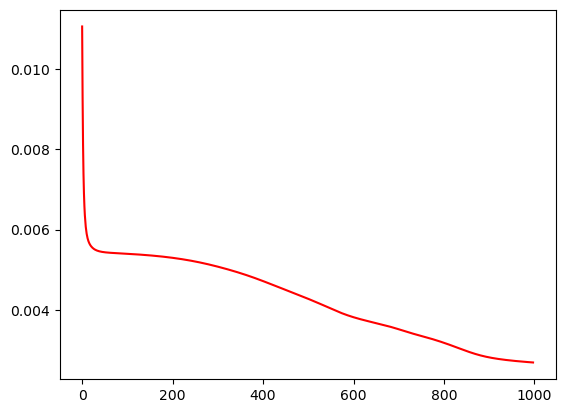

0.0026834172652487344


In [297]:
def activacion(x,W): 
    Y = []
    y = x
    for i in range(len(W)): 
        Y.append(bias_add(y))
        y = np.tanh( Y[i] @ W[i] )
    Y.append(y)
    return Y
def backpropagation(Y,z,eta): 
    dW = []
    D = []
    n = len(Y)
    E = z - Y[n-1]
    error = np.mean(np.square(z - Y[n-1]))
    dY = 1 - np.square(Y[n-1])
    D.insert(0,E*dY)
    k = n-2
    while k != -1:
        dW.insert(0,eta * (Y[k]).T @ D[0])
        E = D[0] @ (W[k]).T
        dY = 1 - np.square(Y[k])
        D.insert(0,bias_ex(E*dY))
        k-=1
    return [dW,error]
W_1 = np.random.normal(0,0.5,(11,3))
W_2 = np.random.normal(0,0.5,(4,3))
W_3 = np.random.normal(0,0.5,(4,1))
W = [W_1,W_2,W_3]
eta = 0.001
B = 40
epoch = 1
epoch_max = 999
er_min = 1e-3
Ers = []
stocastic = np.random.permutation(340)
while (epoch < epoch_max): 
    e = 0
    for h in range(0,340,B):
        batch = stocastic[h:h+B]
        Xh = []
        Zh = []
        for i in batch: 
            Xh.append(xtrn[i])
            Zh.append(ztrn[i])
        Yh = activacion(Xh,W)
        dW,error = backpropagation(Yh,Zh,eta)
        # Adatacion 
        for i in range(len(W)): 
            W[i] += dW[i]
        # Estimacion 
        e += error
    Ers.append(e/P)
    epoch += 1
mpl.plot(Ers,'r')
mpl.show()
print(min(Ers))

Evaluamos los datos para prueba, nos quedo un error cuadratico medio aprox de 0.15: 

In [298]:
e = 0 
for i in range(70): 
    e += np.square(np.round(activacion([xval[i]],W)[3]) - zval[i])
    
e /= 70
e

array([[0.15714286]])

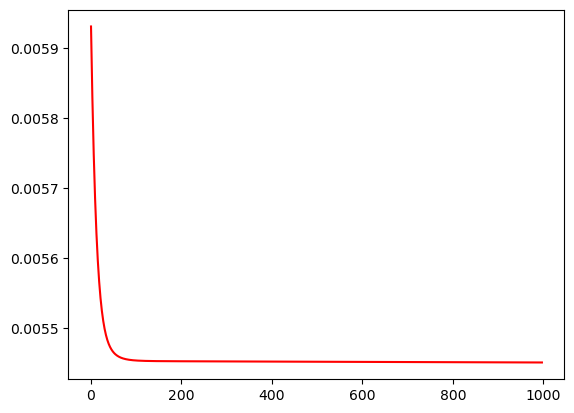

0.005451407206372024


In [299]:
def sig(V): 
    res = []
    for x in V: 
        res.append(1/(1 + np.e**(-x)))
    return res

def activacion(x,W): 
    Y = []
    y = x
    for i in range(len(W)):
        Y.append(bias_add(y))
        y = sig( Y[i] @ W[i] )
    Y.append(y)
    return Y

def backpropagation(Y,z,eta): 
    dW = []
    D = []
    n = len(Y)
    E = z - Y[n-1]
    error = np.mean(np.square(z - Y[n-1]))
    k = n-2
    dY = Y[n-1] - np.square(Y[n-1])
    D.insert(0,E*dY)
    while k != -1:
        dW.insert(0,eta * (Y[k]).T @ D[0])
        E = D[0] @ (W[k]).T
        dY = Y[k] - np.square(Y[k])
        D.insert(0,bias_ex(E*dY))
        k-=1
    return [dW,error]

W_1 = np.random.normal(0,0.5,(11,3))
W_2 = np.random.normal(0,0.5,(4,3))
W_3 = np.random.normal(0,0.5,(4,1))
W = [W_1,W_2,W_3]
eta = 0.001
B = 40
epoch = 1
epoch_max = 999
er_min = 1e-4
Ers = []
stocastic = np.random.permutation(340)
while (epoch < epoch_max): 
    e = 0
    for h in range(0,340,B):
        batch = stocastic[h:h+B]
        Xh = []
        Zh = []
        for i in batch: 
            Xh.append(xtrn[i])
            Zh.append(ztrn[i])
        Yh = activacion(Xh,W)
        Zh = np.array(Zh)
        dW,error = backpropagation(Yh,Zh,eta)
        # Adatacion 
        for i in range(len(W)): 
            W[i] += dW[i]
        # Estimacion 
        e += error
    Ers.append(e/P)
    epoch += 1
mpl.plot(Ers[100:],'r')
mpl.show()
print(min(Ers))

Evaluamos los datos para prueba, nos quedo un error cuadratico medio aprox de 0.5 

In [300]:
e = 0 
for i in range(70): 
    e += np.square(np.round(activacion([xval[i]],W)[3]) - zval[i])   
e /= 70
e

array([[0.5]])

cambiar el modelo, probar con otras capas y unidades para ver si mejora el error cuadratico.

#### Por lo que obtenemos un mejor modelo cuando tomamos la funcion de activacion tanh. 

Ejercicio 2 

3 capas es mucho, funcion lineal en la ultima capa, minmax para acotar el espacio de salida ie de los Zs 

In [142]:
raw_data = open('tp1_ej2_training.csv')
data2 = np.loadtxt(raw_data,delimiter=",")

x = data2[:,:8]
z = data2[:,8:]
P = len(data2)
#(datos - min_valor) / (max_valor - min_valor)
min_v = np.min(z) 
max_v = np.max(z)

In [143]:
X = (x-x.mean(axis=0)) / x.std()
Z = (z - min_v) / (max_v - min_v)

In [156]:
i = 400
indices = np.random.permutation(P)
trn = indices[:i]
val = indices[i:]
xtrn, ztrn = X[trn], Z[trn]
xval, zval = X[val], z[val]

El modelo que usamos para este problema tiene ocho variables de entrada y dos variables objetivo. En base a la experimentación con diferentes modelos de redes neuronales obtuvimos los mejores resultados con tres capas ocultas, de 6, 5, 5 unidades respectivamente.

Normalizamos los datos, considerando las medias individuales y la desviación estándar total de los datos. En este caso obtuvimos resultados mucho mejores de esta manera.

Separamos las 500 instancias de datos en 400 datos de entrenamiento (80%) y 100 datos de validación, aleatoriamente. Usamos la forma de validación hold-out.

El coeficiente de aprendizaje que usamos es de 10^-3, al igual que en el experimento anterior, en tanto fue el más efectivo entre los distintos coeficientes que probamos (10^-2, 10^-4, 10^-5). El error decrece suficientemente rápido sin quedar trabado en mínimos locales.

La funcion de activacion que usamos fue la tanh puesto su imagen es -1 1, lo cual conviene debido a la naturaleza de los datos de salida normalizados.

Realizamos 1000 iteraciones en el entrenamiento, en tanto observamos con los distintos experimentos que realizar una menor cantidad de iteraciones afectaba considerablemente al error obtenido tanto al final del entrenamiento como a la hora de la validación. Sin embargo, realizar más iteraciones reduce el error con los datos de entrenamiento, pero no mejora los resultados al evaluar con los datos de validación, pues se pierde capacidad de generalización.

En el gráfico del error a lo largo del entrenamiento, que está al final del código, graficamos solo desde la iteración número 100 en adelante, ya que el error baja muy rápido comparativamente al principio con las demás y no se llega a apreciar nada, queda como una "L" demasiado marcada.

A la hora de la validación, este es un problema de regresión, por lo que debemos predecir los valores de respuesta a partir de una entrada. Entonces analizamos el error obtenido entre los datos reales y los generados por el modelo.

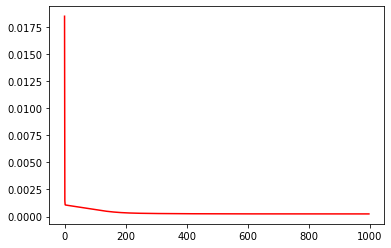

0.00024326653781949392


In [163]:
def sig(V): 
    res = []
    for x in V: 
        res.append(1/(1 + np.e**(-x)))
    return res
# Aproximacion de funciones
def bias_add(V): 
    bias = np.ones((len(V),1))
    return np.hstack([V,bias])

def bias_ex(V): 
    return V[:,:-1]

def activacion(x,W): 
    Y = []
    y = x
    for i in range(len(W)): 
        if (i == len(W)-1): 
            Y.append(bias_add(y))
            y = Y[i] @ W[i] 
        else: 
            Y.append(bias_add(y))
            y = sig( Y[i] @ W[i] )
    Y.append(y)
    return Y

def backpropagation(Y,z,eta): 
    dW = []
    D = []
    n = len(Y)
    E = z - Y[n-1]
    error = np.mean(np.square(z - Y[n-1]))
    D.insert(0,E)
    k = n-2
    while k != -1:
        dW.insert(0,eta * (Y[k]).T @ D[0])
        E = D[0] @ (W[k]).T
        dY = Y[k] - np.square(Y[k])
        D.insert(0,bias_ex(E*dY))
        k-=1
    return [dW,error]
W_1 = np.random.normal(0,0.5,(9,15))
W_2 = np.random.normal(0,0.5,(16,10))
#W_3 = np.random.normal(0,0.5,(7,5))
W_3 = np.random.normal(0,0.5,(11,2))
W = [W_1,W_2,W_3]
eta = 0.001
B = 40
epoch = 1
epoch_max = 999
er_min = 1e-4
Ers = []
stocastic = np.random.permutation(400)
while (epoch < epoch_max): 
    e = 0
    for h in range(0,400,B):
        batch = stocastic[h:h+B]
        Xh = []
        Zh = []
        for i in batch: 
            Xh.append(xtrn[i])
            Zh.append(ztrn[i])
        Yh = activacion(Xh,W)
        #Zh = np.arr
        dW,error = backpropagation(Yh,Zh,eta)
        # Adatacion 
        for i in range(len(W)): 
            W[i] += dW[i]
        # Estimacion 
        e += error
    Ers.append(e/P)
    epoch += 1
mpl.plot(Ers,'r')
mpl.show()
print(min(Ers))

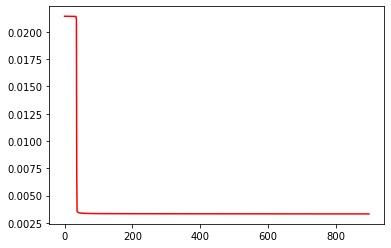

0.0033197552396842505


In [92]:
def activacion(x,W): 
    Y = []
    y = x
    for i in range(len(W)): 
        Y.append(bias_add(y))
        y = np.tanh( Y[i] @ W[i] )
    Y.append(y)
    return Y
def backpropagation(Y,z,eta): 
    dW = []
    D = []
    n = len(Y)
    E = z - Y[n-1]
    error = np.mean(np.square(z - Y[n-1]))
    dY = 1 - np.square(Y[n-1])
    D.insert(0,E*dY)
    k = n-2
    while k != -1:
        dW.insert(0,eta * (Y[k]).T @ D[0])
        E = D[0] @ (W[k]).T
        dY = 1 - np.square(Y[k])
        D.insert(0,bias_ex(E*dY))
        k-=1
    return [dW,error]
W_1 = np.random.normal(0,0.5,(9,100))
W_2 = np.random.normal(0,0.5,(101,100))
W_3 = np.random.normal(0,0.5,(101,50))
W_4 = np.random.normal(0,0.5,(51,2))
W = [W_1,W_2,W_3,W_4]
eta = 0.001
B = 40
epoch = 1
epoch_max = 999
er_min = 1e-4
Ers = []
stocastic = np.random.permutation(400)
while (epoch < epoch_max): 
    e = 0
    for h in range(0,400,B):
        batch = stocastic[h:h+B]
        Xh = []
        Zh = []
        for i in batch: 
            Xh.append(xtrn[i])
            Zh.append(ztrn[i])
        Yh = activacion(Xh,W)
        #Zh = np.arr
        dW,error = backpropagation(Yh,Zh,eta)
        # Adatacion 
        for i in range(len(W)): 
            W[i] += dW[i]
        # Estimacion 
        e += error
    Ers.append(e/P)
    epoch += 1
mpl.plot(Ers[100:],'r')
mpl.show()
print(min(Ers))

Para ver el error de prediccion con los datos de validacion, primero desnormalizamos los datos de salida, luego restamos y tomamos valor absoluto, para finalmente calcular la media de cada variable: 

Error de carga de calefaccion: 2.706 (aprox)

Error de carga de refrigeracion: 2.301 (aprox)

In [164]:
h = []
for i in range(100):
    h.append(np.abs(activacion([xval[i]],W)[3]*(max_v - min_v)+ min_v - zval[i]))
h = np.array(h)

In [165]:
h.mean(axis=0)

array([[3.45919025, 3.74683306]])

In [419]:
uu=h[:,0]
er = uu[:,[0]]
do = uu[:,[1]]

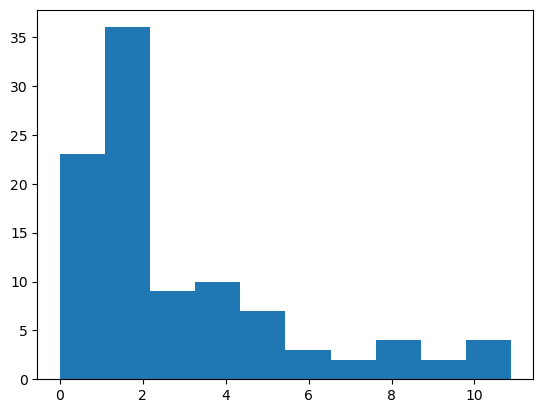

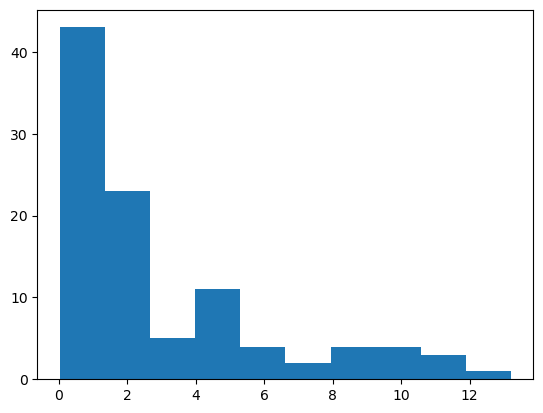

In [429]:
mpl.hist(er)
mpl.show()

mpl.hist(do)
mpl.show()

En este histograma vemos los errores en los datos de validacion, los cuales en su mayoria se encuentran entre 0,4